1. Carga el dataset de Boston Housing dataset. En cada ejercicio puedes dividir en train y
test. (Tarde)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model # Modulo

In [52]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


2. Dentro de la pagina de Kaggle de Boston Housing, en la vista general se encuentra la
descripción de las distintas variables contenidas en el dataset. La variable objetivo a
predecir es medv.

a. Haz un histograma de la variable objetivo con la función hist.

b. Ahora haz un histograma de la variable objetivo mediante la función distplot de la
librería seaborn.

c. Verifica que no hay ningún missing en ninguna de las variables del dataset.

d. Haz un scatter con cada una de las variables age, dis, lstat y rm con la variable a
predecir medv. Entiende las variables e interpreta los gráficos. Si estimaramos
un modelo de regresión lineal con estas 4 variables:

i. ¿qué signo esperas para cada uno de los coeficientes de estas
variables?

ii. ¿tiene sentido el signo esperado teniendo en cuenta la relación
económica entre la variable y la variable objetivo?

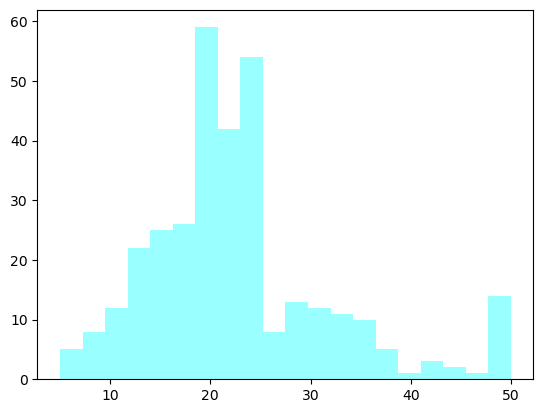

In [53]:
plt.hist(df.medv, bins=20, alpha=0.4, color="cyan")
plt.show()

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


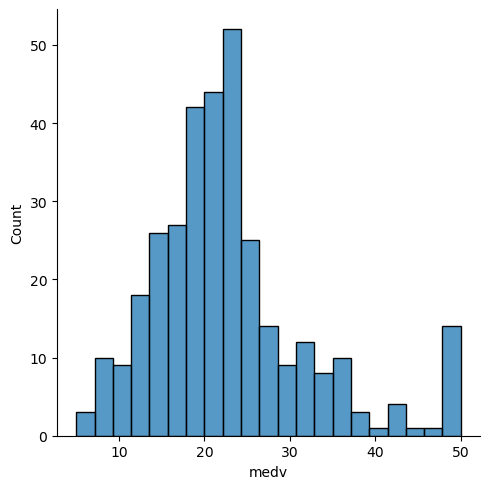

In [54]:
sns.displot(data=df, x="medv")

In [55]:
# df.isnull().sum()
df.isnull().values.any()

False

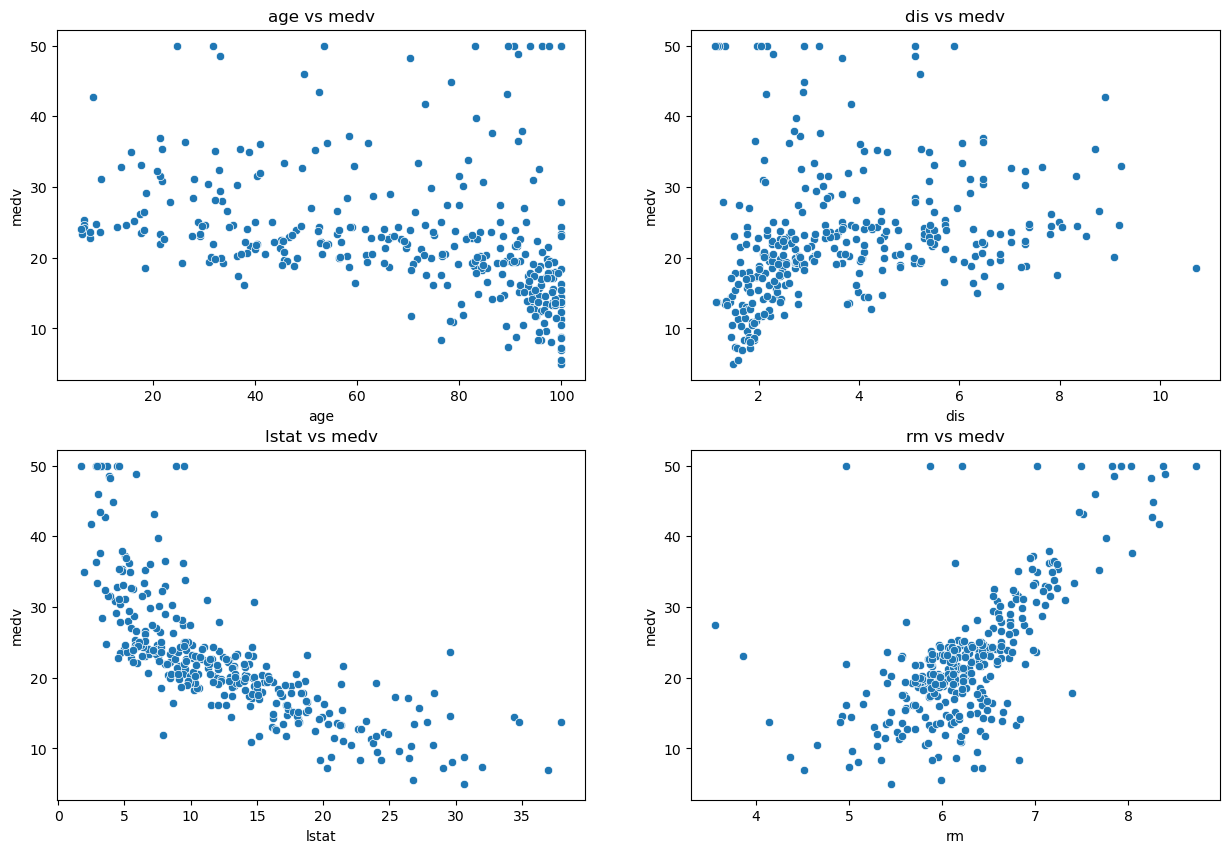

In [56]:
# d. Haz un scatter con cada una de las variables age, dis, lstat y rm con la variable a
# predecir medv. Entiende las variables e interpreta los gráficos. Si estimaramos
# un modelo de regresión lineal con estas 4 variables:

variables = ['age', 'dis', 'lstat', 'rm']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.scatterplot(data=df, x=var, y='medv', ax=axes[row][col])
    axes[row][col].set_title(f'{var} vs medv')

plt.show()

Age: por media cunatos mas años tenga la viviendda menos vale

Dis: cuanta menor sea la distancia a centros de trabajo, menor es el precio

Lstat: Cuanto mayor es el porcenatje de status de l apoblacion menor es el percio

Rm: Cuantas mas habitaciones haya mas caro es el precio

i. ¿qué signo esperas para cada uno de los coeficientes de estas
variables?

Age(-), Dis(+), Lstat(-), Rm(+)

ii. ¿tiene sentido el signo esperado teniendo en cuenta la relación
económica entre la variable y la variable objetivo?

excepto en Dis, el resto si


3. Estima 4 regresiones lineales simples distintas, una para cada una de las 4 variables
anteriores.

a. Obtén el coeficiente de la pendiente de cada recta y grafica la recta de ajuste
junto a la nube de puntos. ¿Coincide el signo con lo que esperabas en el
apartado d anterior?

b. ¿Cuál de los 4 modelos obtiene mejor MSE? ¿Cuál obtiene mejor R2?

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [58]:
#'age'

regresion_lineal = linear_model.LinearRegression()
X = df[["medv"]]
y = df['age']
regresion_lineal.fit(X, y)


LinearRegression()

w_0:  93.28674654359827
MSE 26.21965731326334
R2 0.1288007932591304


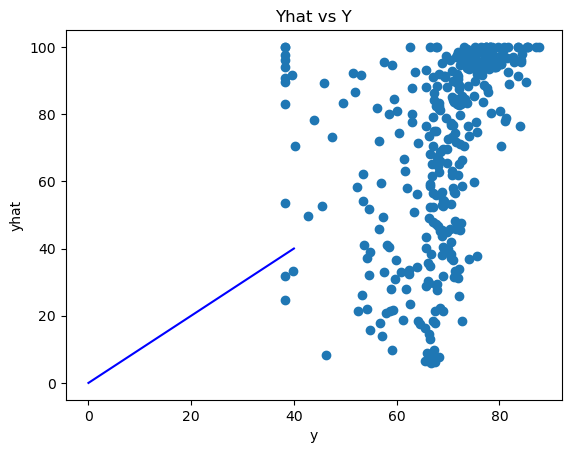

w_0:  2.483475661105034
MSE 1.9156264950786723
R2 0.06221146792090593


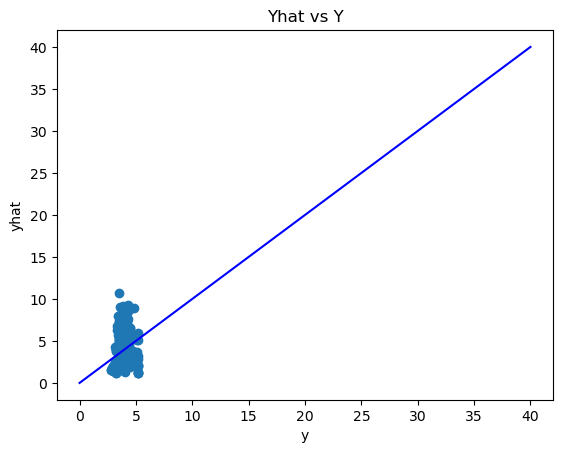

w_0:  25.47225440248203
MSE 4.757541680632132
R2 0.5455300115227188


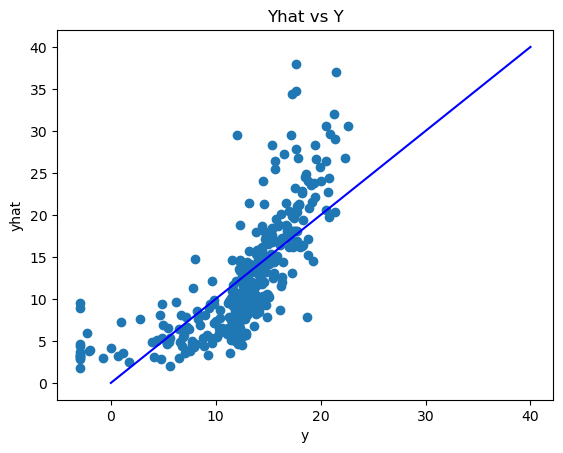

w_0:  5.060735749044309
MSE 0.5090302693733273
R2 0.4755455247485778


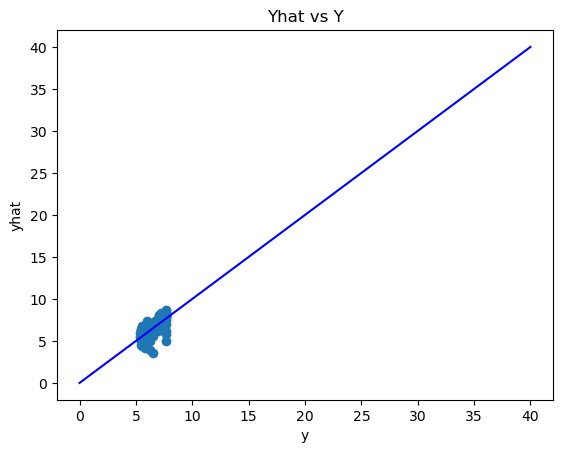

In [59]:
# variables = ['age', 'dis', 'lstat', 'rm']

regresion_lineal = linear_model.LinearRegression()
X = df[["medv"]]

for i in variables:

     # podemos poner un dataframe o un numpy values
    y = df[i]
    regresion_lineal.fit(X, y)

    print ('w_0: ', regresion_lineal.intercept_) #(b) # termino independiente

    yhat = regresion_lineal.predict(X) # se aplica la formula
    print("MSE", mean_squared_error(y, yhat)**(1/2))
    print("R2", r2_score(y, yhat))

    plt.title("Yhat vs Y")
    plt.plot(yhat, y,"o")
    plt.plot([0,40],[0,40],"b")
    plt.xlabel("y")
    plt.ylabel("yhat")
    plt.show()


Mejor MSE: RM 
Mejor R2: Dis


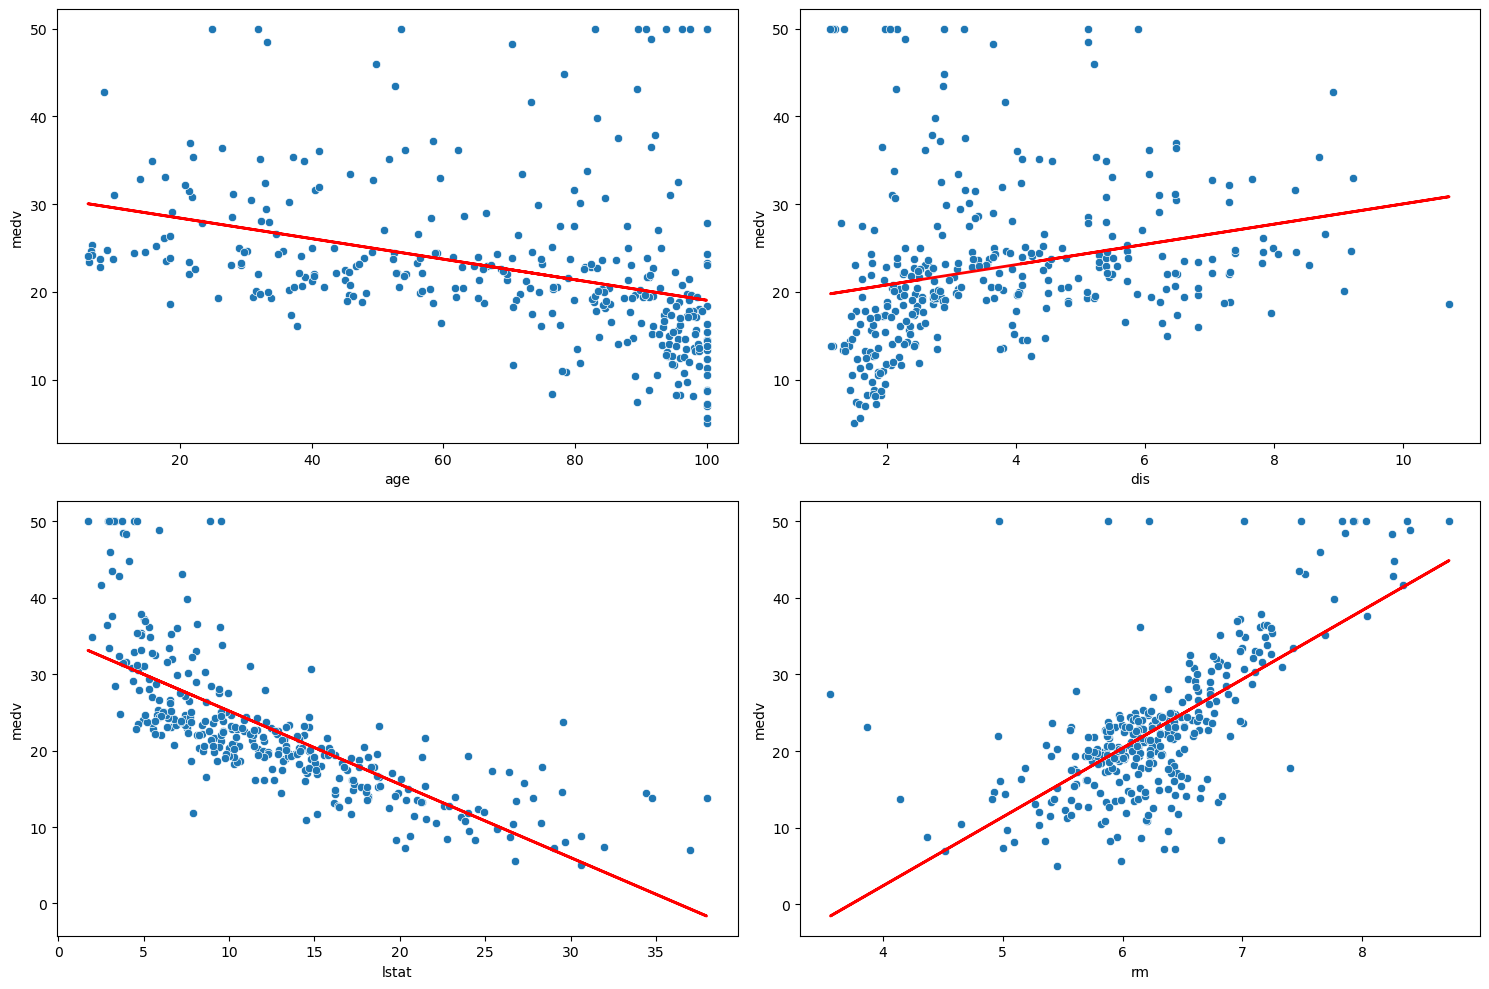

Coefficients: {'age': -0.11702306535747861, 'dis': 1.1549344205708219, 'lstat': -0.9586493969218298, 'rm': 8.986422137322446}
MSE results: {'age': 73.0934439023321, 'dis': 78.68027533932558, 'lstat': 38.12994358928325, 'rm': 44.00162841002105}
R² results: {'age': 0.12880079325913063, 'dis': 0.06221146792090593, 'lstat': 0.5455300115227188, 'rm': 0.4755455247485779}
Best model by MSE: lstat with MSE = 38.13
Best model by R²: lstat with R² = 0.55


In [60]:

from sklearn.linear_model import LinearRegression
# Crear una lista con las variables independientes
variables = ['age', 'dis', 'lstat', 'rm']
target = 'medv'

# Inicializar listas para almacenar resultados
coefficients = {}
mse_results = {}
r2_results = {}

# Crear gráficos de dispersión con la recta de ajuste
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    
    # Extraer las variables independientes (X) y la variable dependiente (y)
    X = df[[var]]
    y = df[target]
    
    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    
    # Obtener el coeficiente de la pendiente
    coefficients[var] = model.coef_[0]
    
    # Predecir los valores
    y_pred = model.predict(X)
    
    # Calcular el MSE y R²
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    mse_results[var] = mse
    r2_results[var] = r2
    
    # Graficar la nube de puntos y la recta de ajuste
    sns.scatterplot(data=df, x=var, y=target, ax=axes[row][col])
    axes[row][col].plot(X, y_pred, color='red', linewidth=2)

plt.tight_layout()
plt.show()

# Mostrar los resultados
print("Coefficients:", coefficients)
print("MSE results:", mse_results)
print("R² results:", r2_results)

# Determinar el mejor modelo según MSE y R²
best_mse_model = min(mse_results, key=mse_results.get)
best_r2_model = max(r2_results, key=r2_results.get)

print(f"Best model by MSE: {best_mse_model} with MSE = {mse_results[best_mse_model]:.2f}")
print(f"Best model by R²: {best_r2_model} with R² = {r2_results[best_r2_model]:.2f}")

Profe explanation:

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo_lstat = LinearRegression() #no est aajustado aun

In [62]:
X = df[["lstat"]]
modelo_lstat.fit(X,y) #aqui s ajuts
#fit modifica internamente

LinearRegression()

In [63]:
modelo_lstat.coef_

array([-0.9586494])

In [64]:
modelo_lstat.intercept_

34.76668340116305

In [65]:
# y = 34.7 -0.95 lstat

In [66]:
yhat = modelo_lstat.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

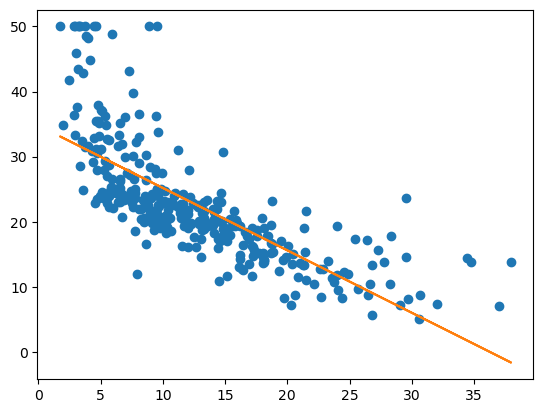

In [67]:
plt.plot(X,y, 'o') # saco el grafico de pntpos y valores
plt.plot(X,yhat) # saca la recta de predcicion
plt.show

pedinete negativa port lo que habiamos predicho antes era verdad

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yhat)

38.12994358928325

In [69]:
r2_score(y,yhat)

0.5455300115227188

<function matplotlib.pyplot.show(close=None, block=None)>

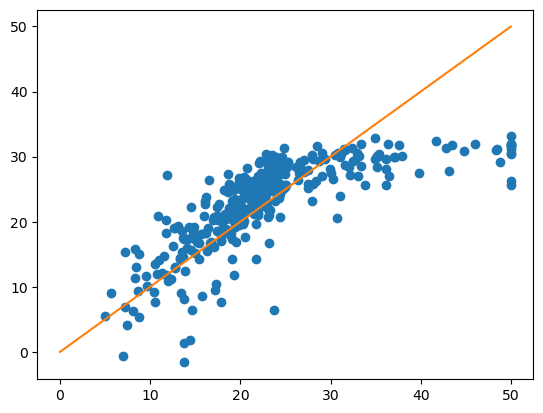

In [70]:
plt.plot(y,yhat,'o')
plt.plot([0,50],[0,50])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

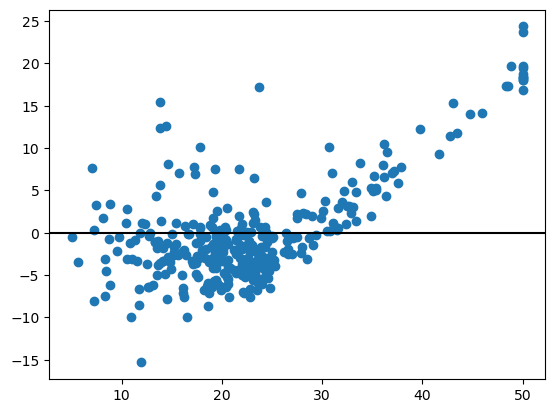

In [71]:
error = y-yhat
plt.plot(y,error,'o')
plt.axhline(y=0, color="k")
plt.show

4. Ahora estima una regresión incorporando solamente las variables lstat y rm.

a. Obtén los coeficientes de cada variable. ¿Siguen presentando el mismo signo
que por separado?

b. ¿El nuevo modelo presenta mejor MSE y mejor R2?

c. Gráfica la variable objetivo (la y real) contra la predicción y analiza el gráfico.

d. ¿Cual es el efecto marginal de cada variable?

In [72]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [73]:
X = df[["rm", "lstat"]]
y = df['medv']

In [74]:
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X, y) # ajustamos con nuestros datos

LinearRegression()

In [75]:
print ('w_1: ', regresion_lineal.coef_)
print ('w_0: ', regresion_lineal.intercept_) # b_0, #theta_0
X.describe()

w_1:  [ 4.92846523 -0.65639414]
w_0:  0.10394380202172115


,rm,lstat
count,333.000000,333.000000
mean,6.265619,12.515435
std,0.703952,7.067781
min,3.561000,1.730000
25%,5.884000,7.180000
50%,6.202000,10.970000
75%,6.595000,16.420000
max,8.725000,37.970000


In [76]:
yhat = regresion_lineal.predict(X)

In [77]:
r2_sin_ajustar = r2_score(y,yhat) # r2_score
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(r2_sin_ajustar, r2_ajustada)

print("El RMSE es de: %.10f" % mean_squared_error(y, yhat, squared = False))
print("El MSE es de: %.10f" % mean_squared_error(y, yhat))

0.6343339677660715 0.6321178099949568
El RMSE es de: 5.5388905877
El MSE es de: 30.6793089425


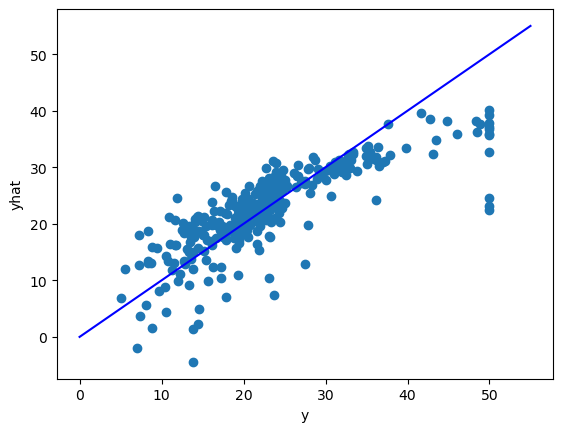

In [78]:
plt.plot(y,yhat,"o")
plt.plot([0,55],[0,55],"b")
plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

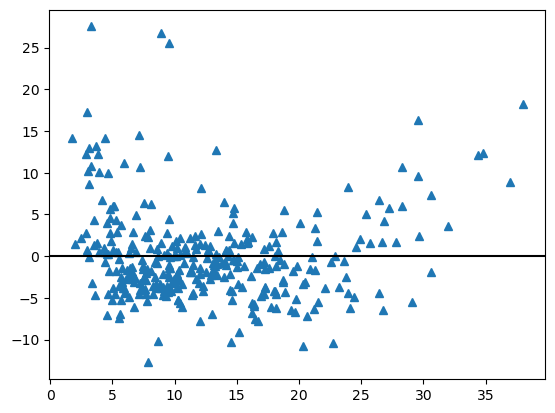

In [79]:
error = y-yhat
plt.plot(X["lstat"], error, "^")
plt.axhline(y=0, color="k")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

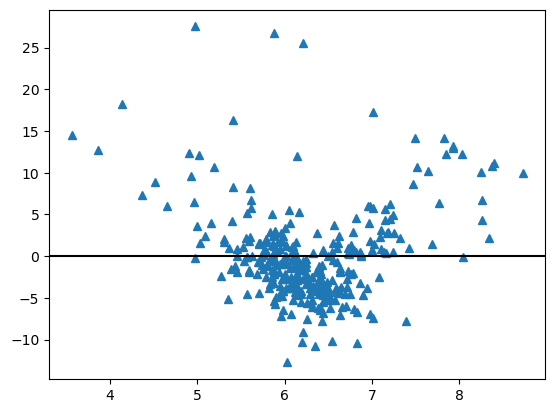

In [80]:
plt.plot(X["rm"], error, "^")
plt.axhline(y=0, color="k")
plt.show

5. Ahora estima una regresión incorporando solamente las variables lstat, rm y age.

a. Obtén los coeficientes de cada variable. ¿Siguen presentando el mismo signo
que por separado?

b. ¿El nuevo modelo presenta mejor MSE y mejor R2 que el anterior?

c. ¿Qué conclusión sacas de incorporar la variable age?

In [81]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [82]:
X = df[["rm", "lstat", "age"]]
y = df['medv']

In [83]:
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X, y) # ajustamos con nuestros datos

LinearRegression()

In [84]:
print ('w_1: ', regresion_lineal.coef_)
print ('w_0: ', regresion_lineal.intercept_) # b_0, #theta_0
X.describe()

w_1:  [ 4.80393543 -0.70380647  0.01696995]
w_0:  0.31978702608115483


,rm,lstat,age
count,333.000000,333.000000,333.000000
mean,6.265619,12.515435,68.226426
std,0.703952,7.067781,28.133344
min,3.561000,1.730000,6.000000
25%,5.884000,7.180000,45.400000
50%,6.202000,10.970000,76.700000
75%,6.595000,16.420000,93.800000
max,8.725000,37.970000,100.000000


In [85]:
yhat = regresion_lineal.predict(X)

In [86]:
r2_sin_ajustar = r2_score(y,yhat) # r2_score
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(r2_sin_ajustar, r2_ajustada)

print("El RMSE es de: %.10f" % mean_squared_error(y, yhat, squared = False))
print("El MSE es de: %.10f" % mean_squared_error(y, yhat))

0.636046698621894 0.6327279755090238
El RMSE es de: 5.5259036507
El MSE es de: 30.5356111570


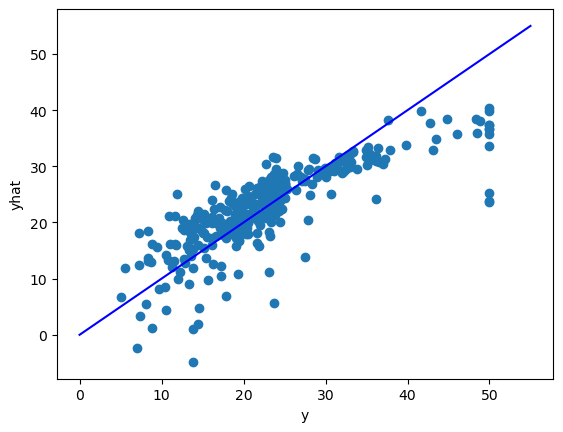

In [87]:
plt.plot(y,yhat,"o")
plt.plot([0,55],[0,55],"b")
plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

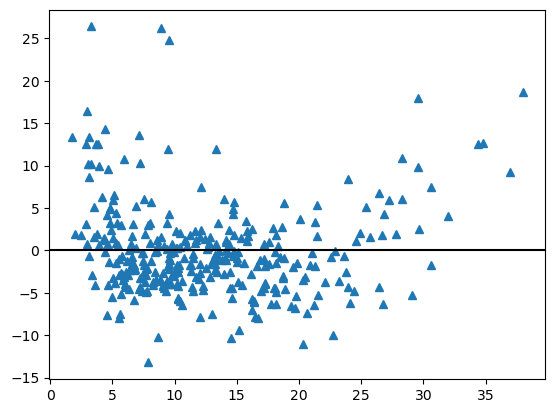

In [88]:
error = y-yhat
plt.plot(X["lstat"], error, "^")
plt.axhline(y=0, color="k")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

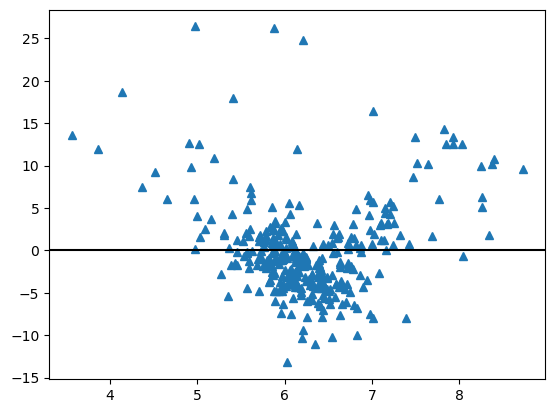

In [89]:
plt.plot(X["rm"], error, "^")
plt.axhline(y=0, color="k")
plt.show

Anterior:
0.6343339677660715 0.6321178099949568
El RMSE es de: 5.5388905877
El MSE es de: 30.6793089425


Nuevo:
0.636046698621894 0.6327279755090238
El RMSE es de: 5.5259036507
El MSE es de: 30.5356111570

Comparación de Modelos
Coeficientes de Determinación (R²):

Modelo anterior: R² = 0.6321
Nuevo modelo: R² = 0.6327
El nuevo modelo tiene un R² ligeramente superior, lo que indica que explica un poco más de la variabilidad en la variable dependiente (medv) en comparación con el modelo anterior.

Error Cuadrático Medio (MSE):

Modelo anterior: MSE = 30.6793
Nuevo modelo: MSE = 30.5356
El nuevo modelo tiene un MSE ligeramente inferior, lo que indica que en promedio, los errores de predicción del nuevo modelo son menores en comparación con el modelo anterior.

Raíz del Error Cuadrático Medio (RMSE):

Modelo anterior: RMSE = 5.5389
Nuevo modelo: RMSE = 5.5259
El nuevo modelo tiene un RMSE ligeramente inferior, lo que también sugiere que los errores de predicción del nuevo modelo son menores en comparación con el modelo anterior.

Conclusión sobre la Inclusión de la Variable age:

Mejora Marginal: La inclusión de la variable age ha proporcionado una mejora marginal en los valores de R², MSE y RMSE. Aunque la mejora es pequeña, es positiva.
Complejidad del Modelo: Añadir una variable más puede aumentar la complejidad del modelo. Sin embargo, en este caso, la mejora en los indicadores de rendimiento, aunque pequeña, justifica la inclusión de la variable adicional, ya que mejora el ajuste del modelo.

Consideración Final:

Dado que el nuevo modelo presenta un mejor rendimiento en términos de MSE, RMSE y R², aunque la mejora es marginal, se puede concluir que el nuevo modelo es preferible al anterior. La inclusión de la variable age aporta una mejora en el rendimiento del modelo, por lo que se considera que el nuevo modelo es mejor, a pesar de la pequeña complejidad adicional introducida por la nueva variable.

In [90]:
boston = df


features = ['age', 'dis', 'lstat', 'rm']
target = boston['medv']


X = boston[list(features[i] for i in [2, 3])]
Y = boston['medv']
X

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,2.94,6.998
3,5.33,7.147
4,12.43,6.012
...,...,...
328,15.10,5.569
329,9.67,6.593
330,9.08,6.120
331,5.64,6.976


In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
polynomial_features= PolynomialFeatures(degree=2)

In [93]:
X_poly = polynomial_features.fit_transform(X) # Todas las variantes, las elevas al cuadrado.
lin_pol = linear_model.LinearRegression()

In [94]:
lin_pol = lin_pol.fit(X_poly, Y)
Y_pred = lin_pol.predict(X_poly)

In [95]:
print(polynomial_features.get_feature_names_out(X.columns))

['1' 'lstat' 'rm' 'lstat^2' 'lstat rm' 'rm^2']


In [96]:
print(lin_pol.coef_)

[ 0.00000000e+00 -6.96669565e-02 -2.38753894e+01  8.70014611e-03
 -1.58335199e-01  2.34496658e+00]


In [97]:
print(lin_pol.intercept_)

90.15406125817718


In [98]:
msq = mean_squared_error(X_poly, Y)

ValueError: y_true and y_pred have different number of output (6!=1)